# Importing...

In [113]:
import pandas as pd

In [114]:
import seaborn as sns

In [115]:
import numpy as np

In [116]:
from sklearn.model_selection import train_test_split

In [117]:
from sklearn.tree import DecisionTreeClassifier

In [118]:
def calculate_accuracy(predictions, actuals):
    if(len(predictions) != len(actuals)):
        raise Exception("The amount of predictions did not equal the amount of actuals")
    
    return (predictions == actuals).sum() / len(actuals)

In [119]:
penguins = sns.load_dataset("penguins").dropna()

# Training a decision tree to predict penguin species based on characteristics...

Splitting the dataset and making a decision tree classifier:

In [120]:
penguins_train, penguins_test = train_test_split(penguins, test_size=0.3, random_state=42, stratify=penguins['species'])
print(penguins_train.shape, penguins_test.shape)

(233, 7) (100, 7)


In [121]:
features= ['bill_depth_mm', 'body_mass_g']
dt_classification = DecisionTreeClassifier(max_depth = 10)
dt_classification.fit(penguins_train[features], penguins_train['species'])

DecisionTreeClassifier(max_depth=10)

Making predictions and calculating the accuracy of them...

In [122]:
predictionsOnTrainset = dt_classification.predict(penguins_train[features])
predictionsOnTestset = dt_classification.predict(penguins_test[features])

In [123]:
accuracyTrain = calculate_accuracy(predictionsOnTrainset, penguins_train.species)
accuracyTest = calculate_accuracy(predictionsOnTestset, penguins_test.species)
print("Accuracy on training set " + str(accuracyTrain))
print("Accuracy on test set " + str(accuracyTest))

Accuracy on training set 0.871244635193133
Accuracy on test set 0.77


The accuracy on the test set is lower. This is to be expected, since the test split is a lot smaller than the training set.

## Making a plottree...

In [124]:
from sklearn import tree
import graphviz

def plot_tree_classification(model, features, class_names):
    # Generate plot data
    dot_data = tree.export_graphviz(model, out_file=None, 
                          feature_names=features,  
                          class_names=class_names,  
                          filled=True, rounded=True,  
                          special_characters=True)  

    # Turn into graph using graphviz
    graph = graphviz.Source(dot_data)  

    # Write out a pdf
    graph.render("decision_tree")

    # Display in the notebook
    return graph 

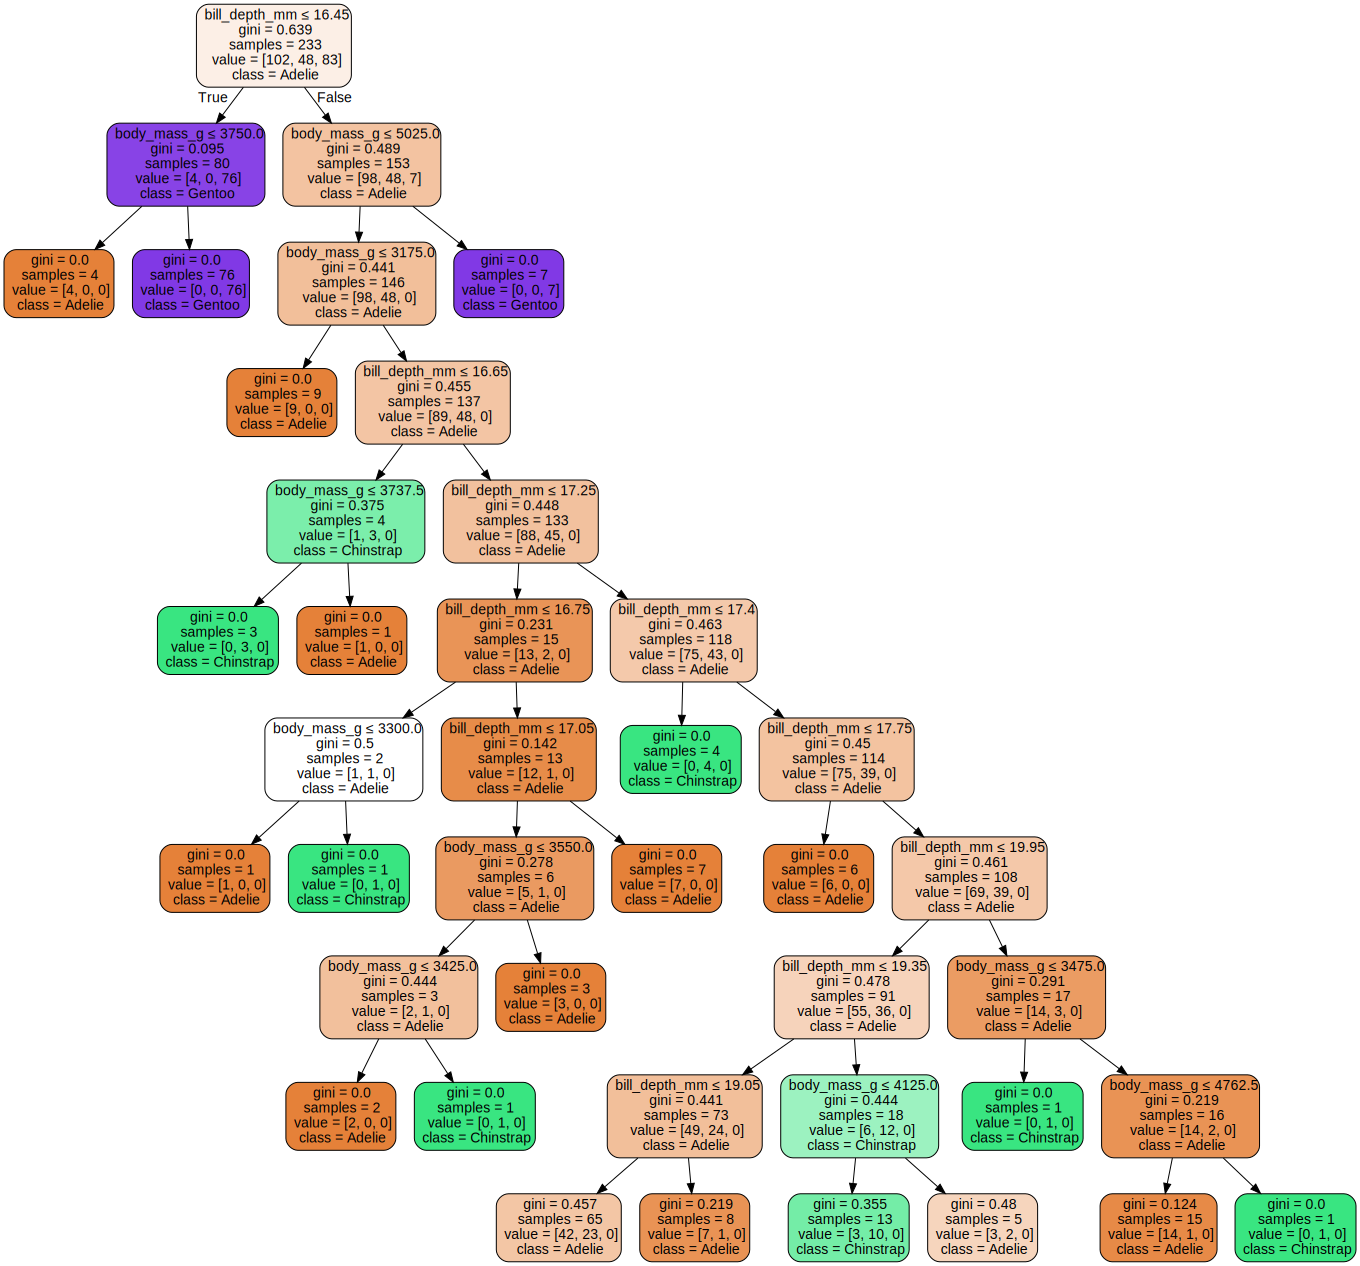

In [125]:
plot_tree_classification(dt_classification, features, np.sort(penguins.species.unique()))